In [1]:
#pip install keras
#pip install -U scikit-learn
#pip install pillow
#pip install matplotlib
#pip install jupyternotify
#unzip train_val_split
%load_ext jupyternotify

<IPython.core.display.Javascript object>

In [2]:
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt

2023-04-01 10:03:07.278066: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Variables Being Used

In [3]:
#variables being used
batch_size=32
#val_split=0.2 #20 percent validation
image_size=512 
image_shape=(image_size,image_size)
#file_directory='/root/DR no aug'
#file_directory='/root/01DR_noDR'
train_file_directory='/root/train_val_split/Training'
validation_file_directory='/root/train_val_split/Validation'
alt_train_file_directory='/root/train_val_split/Training_no_weights'

## Importing Datasets

In [4]:

#from keras.applications.vgg16 import preprocess_input #for that vgg16
#import tensorflow as tf

#from keras.applications.resnet_v2 import ResNet101V2, preprocess_input

training_datagen = ImageDataGenerator( 
        #preprocessing_function=preprocess_input, # use this only when using VGG16
        rescale=1./255,
        rotation_range=45,#can change this
        shear_range=0.2,#can change this
        zoom_range=0.2, #can change this
        horizontal_flip=True,
        fill_mode='reflect',# constant,reflect,wrap,
        )

validation_datagen=ImageDataGenerator(
    #preprocessing_function=preprocess_input,
    rescale=1./255    
        )

#Creating our generators, no need of changing values here
train_generator = training_datagen.flow_from_directory( #Creating our training generator 
        train_file_directory,  
        target_size=image_shape,
        batch_size=batch_size,
        #color_mode='grayscale',
        class_mode='categorical',
        shuffle = False,
        )

validation_generator = validation_datagen.flow_from_directory( #Creating our validation generator
        validation_file_directory, 
        target_size=image_shape, 
        batch_size=batch_size,
        #color_mode='grayscale',
        class_mode='categorical',
        shuffle = False,
)

Found 561 images belonging to 3 classes.
Found 50 images belonging to 3 classes.


## Displaying Images

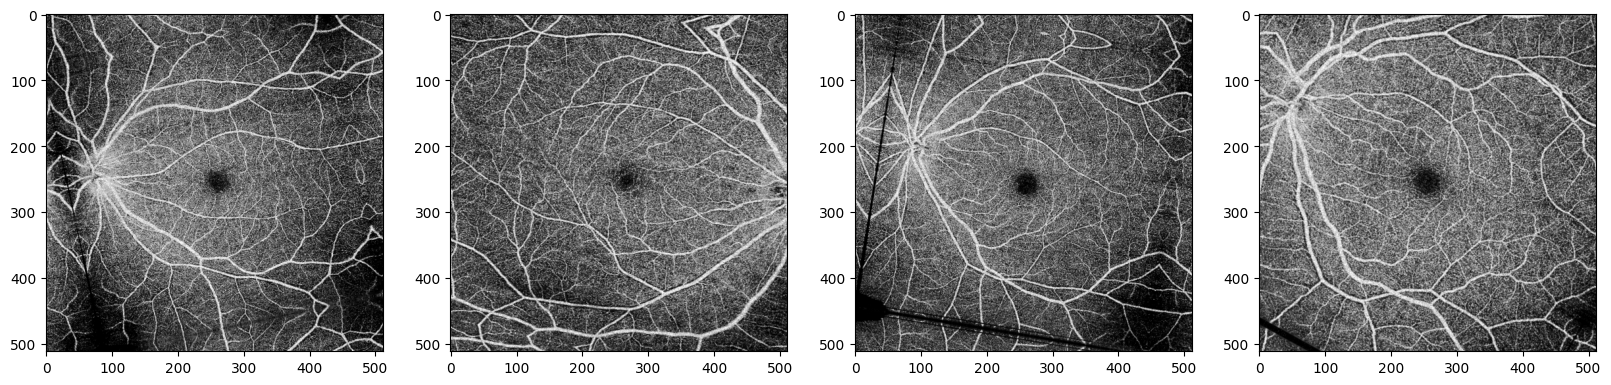

In [5]:
# Enable/Disable to see 4 random images
fig, axs=plt.subplots(ncols=4, figsize=(20,20))
for i in range(4):
  axs[i].imshow(train_generator[i][0][0], cmap='gray', vmin=0, vmax=1)
#axs[0].plt.show()

## Creating weights

In [6]:
import numpy as np ## Calculating the class weights
from sklearn.utils.class_weight import compute_class_weight

class_weighing = compute_class_weight(class_weight='balanced', classes=np.unique(train_generator.classes), y=train_generator.classes)
class_weights=dict(zip(np.unique(train_generator.classes), class_weighing))

print(class_weights)

{0: 0.6051779935275081, 1: 0.9739583333333334, 2: 3.1166666666666667}


## Creating Model

In [7]:
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.inception_v3 import InceptionV3
from keras.models import Sequential,Model
from keras.layers import Conv2D, MaxPooling2D,BatchNormalization
from keras.layers import Activation, Dropout, Flatten, Dense,GlobalAveragePooling2D
from keras.optimizers import SGD


In [8]:
INPUT_SHAPE = (image_size, image_size, 3) 

base_model = InceptionV3(weights='imagenet', include_top=False)
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(3, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False


model.summary()

2023-04-01 10:03:25.767508: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-04-01 10:03:25.770977: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-04-01 10:03:25.771175: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv2d (Conv2D)                (None, None, None,   864         ['input_1[0][0]']                
                                32)                                                               
                                                                                                  
 batch_normalization (BatchNorm  (None, None, None,   96         ['conv2d[0][0]']                 
 alization)                     32)                                                           

In [9]:
for i, layer in enumerate(base_model.layers):
   print(i, layer.name)

0 input_1
1 conv2d
2 batch_normalization
3 activation
4 conv2d_1
5 batch_normalization_1
6 activation_1
7 conv2d_2
8 batch_normalization_2
9 activation_2
10 max_pooling2d
11 conv2d_3
12 batch_normalization_3
13 activation_3
14 conv2d_4
15 batch_normalization_4
16 activation_4
17 max_pooling2d_1
18 conv2d_8
19 batch_normalization_8
20 activation_8
21 conv2d_6
22 conv2d_9
23 batch_normalization_6
24 batch_normalization_9
25 activation_6
26 activation_9
27 average_pooling2d
28 conv2d_5
29 conv2d_7
30 conv2d_10
31 conv2d_11
32 batch_normalization_5
33 batch_normalization_7
34 batch_normalization_10
35 batch_normalization_11
36 activation_5
37 activation_7
38 activation_10
39 activation_11
40 mixed0
41 conv2d_15
42 batch_normalization_15
43 activation_15
44 conv2d_13
45 conv2d_16
46 batch_normalization_13
47 batch_normalization_16
48 activation_13
49 activation_16
50 average_pooling2d_1
51 conv2d_12
52 conv2d_14
53 conv2d_17
54 conv2d_18
55 batch_normalization_12
56 batch_normalization_14
5

### Compile

In [9]:
model.compile(optimizer=SGD(lr=0.0001, momentum=0.5), #SGD or adam
              loss='categorical_crossentropy' ,
              metrics=['accuracy'])

/usr/local/lib/python3.8/dist-packages/keras/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


### Generating Callbacks

In [10]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

filepath="/root/saved_models/{epoch:02d}-{val_accuracy:.2f}.hdf5"

checkpoint= ModelCheckpoint(filepath,monitor='val_accuracy',verbose=0,save_best_only=True,mode='max')
early_stop=EarlyStopping(monitor='val_accuracy',patience=100,verbose=0) #only change patience

callback_list=[checkpoint,early_stop]#add the callbacks used

### Model.Fit()

In [12]:
%%notify
history=model.fit(
        train_generator,
        steps_per_epoch=len(train_generator.classes)//batch_size,
        verbose=1, 
        epochs=300,  #change this
        validation_data=validation_generator,
        validation_steps=len(validation_generator.classes)//batch_size,
        callbacks=callback_list,
        class_weight=class_weights #disable enable this
)
print("Done bro")

Epoch 1/300


2023-04-01 10:04:05.735767: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]
2023-04-01 10:04:10.110757: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8600
2023-04-01 10:04:10.894424: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:637] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


17/17 [==============================] - ETA: 0s - loss: 1.1586 - accuracy: 0.1191

2023-04-01 10:04:29.805899: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


17/17 [==============================] - 26s 1s/step - loss: 1.1586 - accuracy: 0.1191 - val_loss: 1.3155 - val_accuracy: 0.0312
Epoch 2/300
17/17 [==============================] - 22s 1s/step - loss: 1.1471 - accuracy: 0.1040 - val_loss: 1.2905 - val_accuracy: 0.0000e+00
Epoch 3/300
17/17 [==============================] - 23s 1s/step - loss: 1.0707 - accuracy: 0.1011 - val_loss: 1.2316 - val_accuracy: 0.0312
Epoch 4/300
17/17 [==============================] - 23s 1s/step - loss: 1.0565 - accuracy: 0.1140 - val_loss: 1.1826 - val_accuracy: 0.0625
Epoch 5/300
17/17 [==============================] - 22s 1s/step - loss: 1.1187 - accuracy: 0.1248 - val_loss: 1.1874 - val_accuracy: 0.0625
Epoch 6/300
17/17 [==============================] - 22s 1s/step - loss: 0.9876 - accuracy: 0.0888 - val_loss: 1.1500 - val_accuracy: 0.1250
Epoch 7/300
17/17 [==============================] - 22s 1s/step - loss: 1.1323 - accuracy: 0.2476 - val_loss: 1.1612 - val_accuracy: 0.1250
Epoch 8/300
17/17 [==

<IPython.core.display.Javascript object>

### Curves

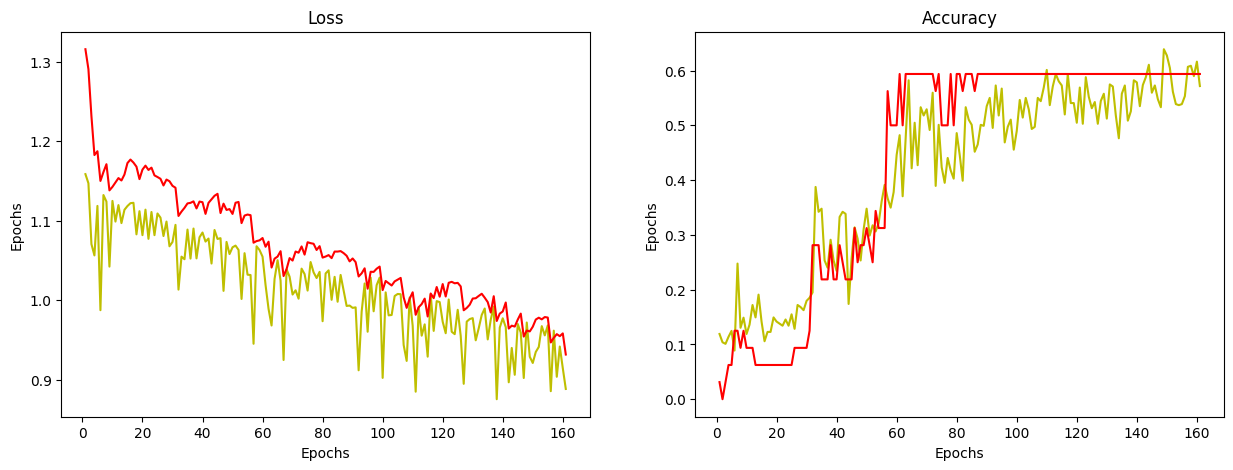

In [13]:
#loss curve
fig, axs=plt.subplots(ncols=2,figsize=(15, 5))#, figsize=(20,20))
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
axs[0].plot(epochs, loss, 'y', label='Training loss')
axs[0].plot(epochs, val_loss, 'r', label='Validation loss')
axs[0].set(title='Loss', xlabel='Epochs', ylabel='Epochs');

#accuracy curve
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
axs[1].plot(epochs, acc, 'y', label='Training acc')
axs[1].plot(epochs, val_acc, 'r', label='Validation acc')
axs[1].set(title='Accuracy', xlabel='Epochs', ylabel='Epochs');

In [14]:
"""prediction_classes = np.array([])
true_classes =  np.array([])
i=0
for x, y in validation_generator:
    if i==len(validation_generator.classes):
        break    
    i=i+1
    prediction_classes = np.concatenate([prediction_classes,np.argmax(model.predict(x,verbose=0), axis = -1)])
    true_classes = np.concatenate([true_classes, np.argmax(y, axis=-1)])
print(classification_report(true_classes, prediction_classes))"""

'prediction_classes = np.array([])\ntrue_classes =  np.array([])\ni=0\nfor x, y in validation_generator:\n    if i==len(validation_generator.classes):\n        break    \n    i=i+1\n    prediction_classes = np.concatenate([prediction_classes,np.argmax(model.predict(x,verbose=0), axis = -1)])\n    true_classes = np.concatenate([true_classes, np.argmax(y, axis=-1)])\nprint(classification_report(true_classes, prediction_classes))'

In [25]:
#model.save('to_continue.h5')
#new_model=load_model('to_continue.h5')

## Evaluating Model

In [23]:
from keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import numpy as np

#model = load_model('/root/44-0.82.hdf5')

In [17]:
#new_model=load_model(".hdf5")

/tmp/ipykernel_23892/1382470098.py:3: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  results=model_eval.evaluate_generator(data_eval, steps=len(data_eval.classes)//batch_size)
2023-04-01 09:54:10.883909: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


Loss and accuracy are [0.8686420321464539, 0.6084558963775635]


/tmp/ipykernel_23892/1382470098.py:5: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = model_eval.predict_generator(data_eval, steps=len(data_eval.classes)//batch_size+1)
2023-04-01 09:54:19.250155: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


Confusion Matrix


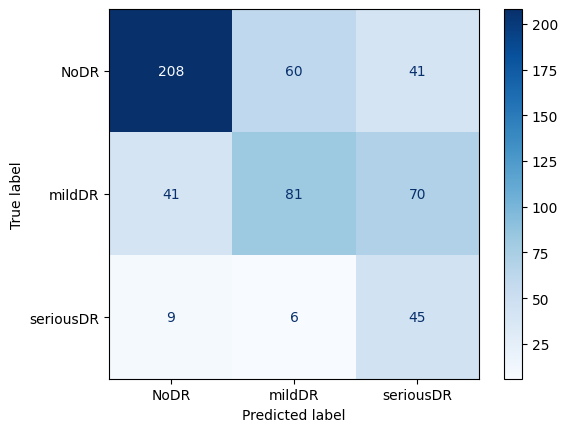

Classification Report
              precision    recall  f1-score   support

        NoDR       0.81      0.67      0.73       309
      mildDR       0.55      0.42      0.48       192
   seriousDR       0.29      0.75      0.42        60

    accuracy                           0.60       561
   macro avg       0.55      0.62      0.54       561
weighted avg       0.66      0.60      0.61       561



In [29]:
data_eval=train_generator
model_eval=new_model
results=model_eval.evaluate_generator(data_eval, steps=len(data_eval.classes)//batch_size)
print("Loss and accuracy are", results)
Y_pred = model_eval.predict_generator(data_eval, steps=len(data_eval.classes)//batch_size+1)
#print(train_generator.classes)
y_pred = np.argmax(Y_pred, axis=1)
#print(train_generator.classes)
#print(y_pred)
#print(X)
        
print('Confusion Matrix')
cm=confusion_matrix(data_eval.classes,y_pred)
target_names = ['NoDR', 'mildDR','seriousDR']
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap=plt.cm.Blues)
plt.show()

print('Classification Report')

print(classification_report(data_eval.classes,y_pred, target_names=target_names))